===== Generation 1 =====
Best Solution: (0.8043224753904177, 19.288559634956016, 964.8906516932285)
Fitness Score: 0.012992030933161133

===== Generation 2 =====
Best Solution: (35.07554571249572, 0.4115168020921711, 640.0252171160353)
Fitness Score: 0.0036744575768410054

===== Generation 3 =====
Best Solution: (42.56697756201175, 4.71889044933993, 682.1124295038711)
Fitness Score: 0.0027366059910112384

===== Generation 4 =====
Best Solution: (14.351493079264976, 39.37045235760006, 731.9621655805624)
Fitness Score: 0.0031310061321679294

===== Generation 5 =====
Best Solution: (65.28207679223719, 57.01917699292978, 635.0136004515964)
Fitness Score: 0.0011316649722877801

===== Generation 6 =====
Best Solution: (3.546724016865615, 13.283132068354963, 987.8814915970319)
Fitness Score: 0.01523941690205971

===== Generation 7 =====
Best Solution: (13.102678190444944, 29.12123167223568, 11.176012238579114)
Fitness Score: 0.004054303441697546

===== Generation 8 =====
Best Solution: (3.581

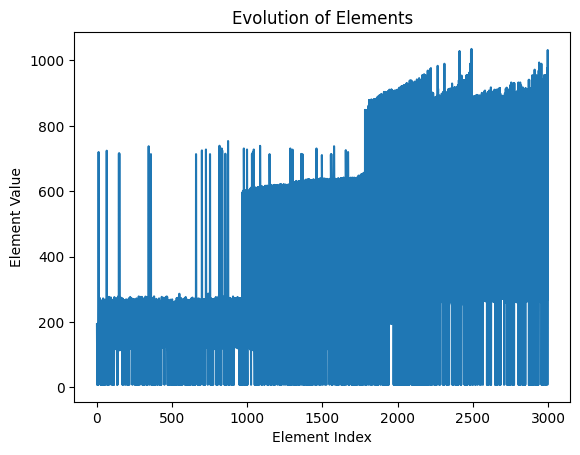

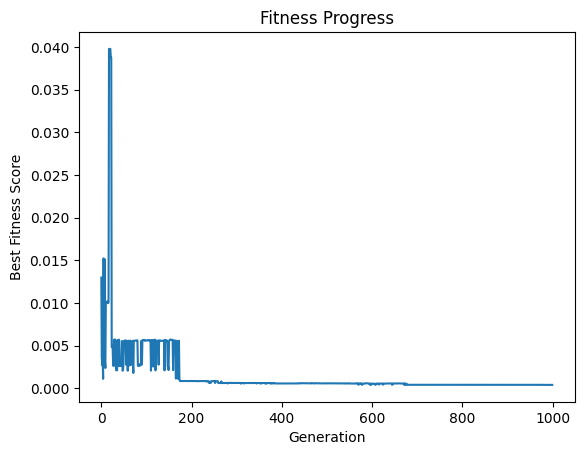

In [3]:
import random
import matplotlib.pyplot as plt
import numpy as np

POPULATION_SIZE = 1000
NUM_GENERATIONS = 1000
MUTATION_RATE = 0.1

def problem(x, y, z):
    return 9 * x + 6 + 6 * y + 9 + z // 12 ** 8 + 8 - 69

def fitness(x, y, z):
    ans = problem(x, y, z)
    if ans == 0:
        return 9999999
    else:
        return abs(1 / ans)

def initialize_population():
    return [(random.uniform(0, 1000), random.uniform(0, 1000), random.uniform(0, 1000))
            for _ in range(POPULATION_SIZE)]

def crossover(parent1, parent2):
    child = []
    for i in range(3):
        if random.random() < 0.5:
            child.append(parent1[i])
        else:
            child.append(parent2[i])
    return tuple(child)

def mutate(solution):
    mutated_solution = []
    for i in range(3):
        if random.random() < MUTATION_RATE:
            mutated_solution.append(solution[i] * random.uniform(0.99, 1.01))
        else:
            mutated_solution.append(solution[i])
    return tuple(mutated_solution)

def evolve(population):
    ranked_solutions = sorted([(fitness(s[0], s[1], s[2]), s) for s in population], reverse=True)
    best_solutions = [s[1] for s in ranked_solutions[:1000]]

    elements = [item for sublist in best_solutions for item in sublist]
    new_generation = []

    while len(new_generation) < POPULATION_SIZE:
        parent1, parent2 = random.choices(best_solutions, k=2)
        child = crossover(parent1, parent2)
        mutated_child = mutate(child)
        new_generation.append(mutated_child)

    return new_generation, elements

def plot_evolution(elements):
    data = np.array(elements)
    plt.plot(data)
    plt.xlabel('Element Index')
    plt.ylabel('Element Value')
    plt.title('Evolution of Elements')
    plt.show()

def plot_fitness_progress(fitness_scores):
    plt.plot(fitness_scores)
    plt.xlabel('Generation')
    plt.ylabel('Best Fitness Score')
    plt.title('Fitness Progress')
    plt.show()

def main():
    population = initialize_population()
    fitness_scores = []

    for i in range(NUM_GENERATIONS):
        population, elements = evolve(population)

        best_solution = max([(fitness(s[0], s[1], s[2]), s) for s in population])
        print(f"===== Generation {i + 1} =====")
        print("Best Solution:", best_solution[1])
        print("Fitness Score:", best_solution[0])
        print()

        fitness_scores.append(best_solution[0])

    plot_evolution(elements)
    plot_fitness_progress(fitness_scores)

if __name__ == '__main__':
    main()